In [1]:
import torch
from agent import Agent, AgentType

In [2]:
def phi(x, beta):
    return beta[1] *x + beta[0]

def w_normalized(all_x, beta):
    unnormalized = phi(all_x, beta)
    return unnormalized/torch.sum(unnormalized)

def w(all_x, beta):
    return phi(all_x, beta)

In [3]:
class DecisionMaker:
    
    def __init__(self, beta, budget):
        self.beta = beta
        self.objective = []
        self.budget = budget
    
    def announce_rule(self, n_agents, perturbation):
        random_signs = torch.bernoulli(size=(n_agents, 2))
        random_signs[random_signs==0] = -1
        
        beta_perturbed = torch.zeros(random_signs.shape) + beta
        beta_perturbed += random_signs * perturbation
        
        return beta_perturbed
    
    def treatment_allocation(self, all_x, beta):
        if self.budget:
            return w_normalized(all_x, beta)
        else:
            return w(all_x, beta)
        
    def policy_objective(self, treatments, outcomes):
        self.objective.append(torch.mean(outcomes).item())
        return torch.mean(outcomes).item()

    
    def update_objective(self, all_x):
        pass
    
        

In [4]:
natural_feature_dist = torch.distributions.normal.Normal(0.2, 0.05)
gamed_feature_dist = torch.distributions.normal.Normal(0.8, 0.05)
manipulability_dist = torch.distributions.uniform.Uniform(0, 0)

agent_type = AgentType(natural_feature_dist, gamed_feature_dist, manipulability_dist)

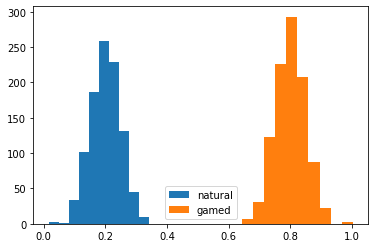

In [5]:
decision_maker= DecisionMaker(torch.Tensor([0., 1.]), budget=False)
n_agents = 1000
agents = [Agent(agent_type) for i in range(n_agents)]
import matplotlib.pyplot as plt
plt.hist([agent.a.item() for agent in agents], label="natural")
plt.hist([agent.b.item() for agent in agents], label="gamed")
plt.legend()

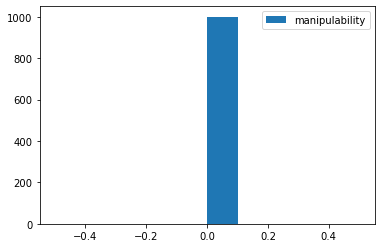

In [6]:
plt.hist([agent.gamma.item() for agent in agents], label="manipulability")
plt.legend()

 49%|████▉     | 2441/5000 [53:02<55:36,  1.30s/it]  


KeyboardInterrupt: 

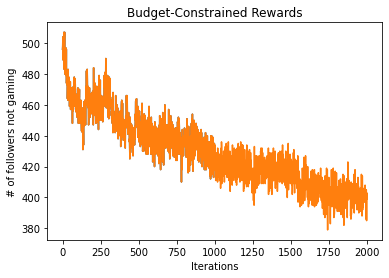

In [8]:
# decision_maker= DecisionMaker(torch.Tensor([0., 1.]), budget=True)
# n_agents = 1000
# agents = [Agent(agent_type) for i in range(n_agents)]
# objs = []
# T= 5000
from tqdm import tqdm
import numpy as np
for i in tqdm(range(T)):
    beta = decision_maker.beta # announce fixed decision rule
    all_x = torch.hstack([agent.present_feature() for agent in agents])
    allocations = decision_maker.treatment_allocation(all_x, beta)
    for j, agent in enumerate(agents):
        agent.update_reward(allocations[j])
    outcomes = [agent.outcome().item() for agent in agents]
#     obj = decision_maker.policy_objective(allocations, torch.Tensor(outcomes))
#     objs.append(obj)
    
    if i > 0 and i % 1000 == 0:
        plt.plot(list(range(i)), [np.sum(np.array([float(agent.actions[k]) for agent in agents])) for k in range(i)])
        plt.xlabel("Iterations")
        plt.ylabel("# of followers not gaming")
        plt.title("Budget-Constrained Rewards")



Text(0.5, 1.0, 'Budget-Constrained Rewards')

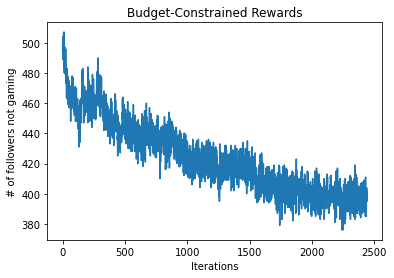

In [10]:
import numpy as np
plt.plot(list(range(i)), [np.sum(np.array([float(agent.actions[k]) for agent in agents])) for k in range(i)])
plt.xlabel("Iterations")
plt.ylabel("# of followers not gaming")
plt.title("Budget-Constrained Rewards")

In [ ]:
import numpy as np

decision_maker= DecisionMaker(torch.Tensor([0., 1.]), budget=False)
n_agents = 1000
agents = [Agent(agent_type) for i in range(n_agents)]
objs = []
T= 200
from tqdm import tqdm
for i in tqdm(range(T)):
    beta = decision_maker.beta # announce fixed decision rule
    all_x = torch.hstack([agent.present_feature() for agent in agents])
    allocations = decision_maker.treatment_allocation(all_x, beta)
    for j, agent in enumerate(agents):
        agent.update_reward(allocations[j])
    outcomes = [agent.outcome().item() for agent in agents]
    obj = decision_maker.policy_objective(allocations, torch.Tensor(outcomes))
    assert obj < 1
    objs.append(obj)

plt.plot(list(range(T)), [np.sum(np.array([float(agent.actions[i]) for agent in agents])) for i in range(T)])
plt.xlabel("Iterations")
plt.ylabel("# of followers not gaming")
plt.title("Unconstrained Rewards")